In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
classification_data = pd.read_csv('/content/modified_classification_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

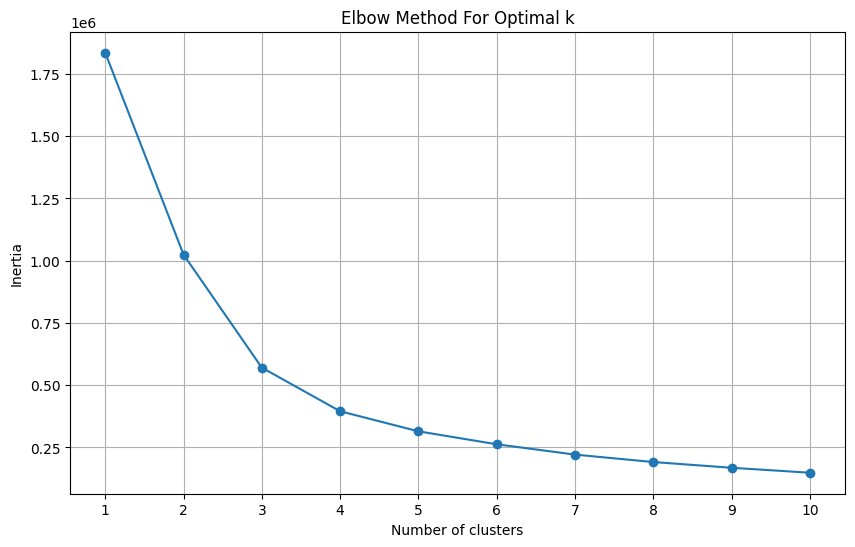

In [3]:
# 使用肘部方法寻找最佳 K 值
inertia = []
k_values = range(1, 11)  # 从 1 到 10 的 K 值

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(classification_data[['Sum1', 'Sum2', 'Score']])
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [6]:
features = classification_data[['Sum1', 'Sum2', 'Score']]
target = classification_data['Grade']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率：{accuracy}')
print(classification_report(y_test, y_pred))

准确率：0.9225806451612903
              precision    recall  f1-score   support

           A       0.92      0.97      0.94        58
           B       0.89      0.89      0.89        38
           C       0.92      0.86      0.89        14
           D       0.93      0.87      0.90        15
           E       0.75      0.60      0.67         5
           F       1.00      1.00      1.00        25

    accuracy                           0.92       155
   macro avg       0.90      0.86      0.88       155
weighted avg       0.92      0.92      0.92       155



In [14]:
from sklearn.model_selection import GridSearchCV

# 设置k值的范围
param_grid = {'n_neighbors': [1, 3, 4, 5, 7, 9]}

# 初始化GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 打印最佳参数和对应的准确率
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f'最佳参数：{best_params}')
print(f'最佳准确率：{best_accuracy}')

最佳参数：{'n_neighbors': 3}
最佳准确率：0.9080645161290322


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'准确率：{accuracy}')
print(classification_report(y_test, y_pred))

准确率：0.9935483870967742
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        58
           B       0.97      1.00      0.99        38
           C       1.00      0.93      0.96        14
           D       1.00      1.00      1.00        15
           E       1.00      1.00      1.00         5
           F       1.00      1.00      1.00        25

    accuracy                           0.99       155
   macro avg       1.00      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f'最佳参数：{best_params}')
print(f'最佳准确率：{best_accuracy}')

最佳参数：{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
最佳准确率：0.9951612903225806


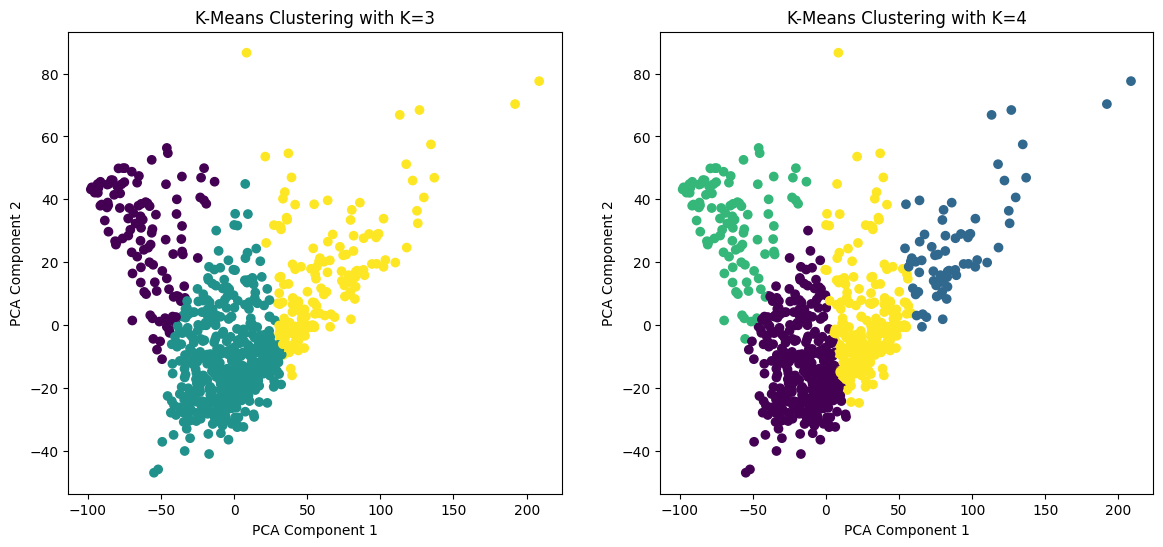

k=3: 0.47967210161223667
k=4: 0.4309800676224769


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 选择特征
features = classification_data[['Sum1', 'Sum2', 'Score']]

# 使用 KMeans 进行聚类，k=3 和 k=4
kmeans_3 = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10, max_iter=300).fit(features)
kmeans_4 = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=10, max_iter=300,).fit(features)

# 计算轮廓系数
silhouette_score_k3 = silhouette_score(features, kmeans_3.labels_)
silhouette_score_k4 = silhouette_score(features, kmeans_4.labels_)

# 将数据降至二维以便可视化
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)

# 可视化聚类结果
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# k=3 的聚类结果
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_3.labels_, cmap='viridis')
axes[0].set_title('K-Means Clustering with K=3')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# k=4 的聚类结果
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_4.labels_, cmap='viridis')
axes[1].set_title('K-Means Clustering with K=4')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.show()
print('k=3:',silhouette_score_k3)
print('k=4:',silhouette_score_k4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Coefficient: 0.41


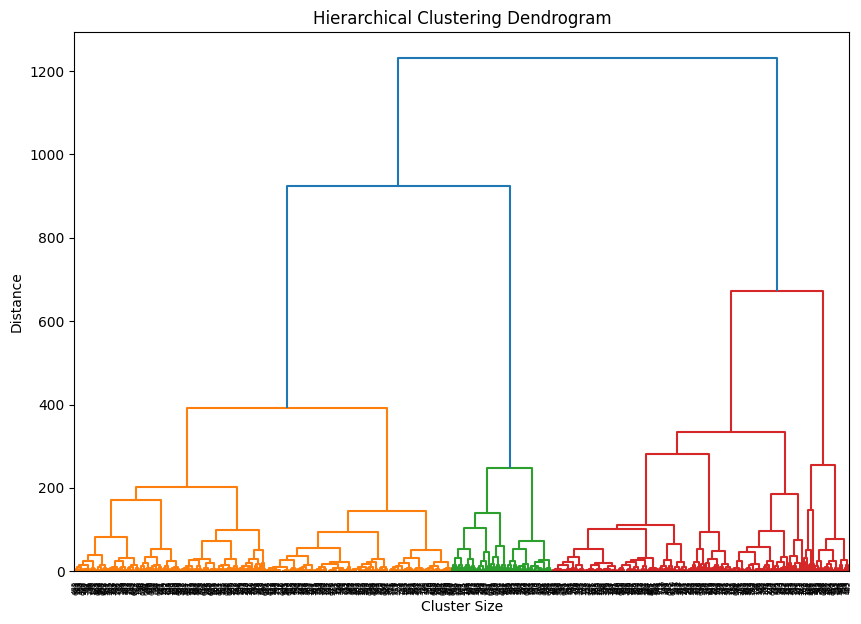

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 使用层次聚类
linked = linkage(classification_data[['Sum1', 'Sum2', 'Score']], method='ward')

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = clustering.fit_predict(features)
silhouette_avg = silhouette_score(features, labels)
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

Silhouette Coefficient: 0.89


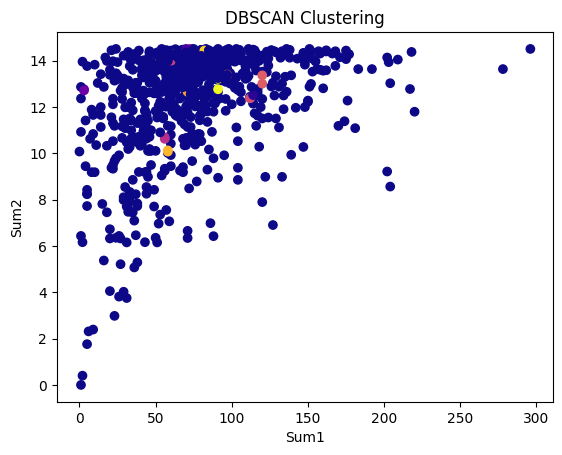

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 应用 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # 这里的 eps 和 min_samples 需要根据数据进行调整
clusters = dbscan.fit_predict(classification_data[['Sum1', 'Sum2', 'Score']])
labels = dbscan.fit_predict(features)
mask = labels != -1
filtered_labels = labels[mask]
filtered_features = features[mask]

if np.unique(filtered_labels).size > 1:
    silhouette_avg = silhouette_score(filtered_features, filtered_labels)
    print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
else:
    print("所有数据点都被标记为噪声，无法计算轮廓系数")

# 可视化结果
plt.scatter(classification_data['Sum1'], classification_data['Sum2'], c=clusters, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Sum1')
plt.ylabel('Sum2')
plt.show()

Silhouette Coefficient: 0.89


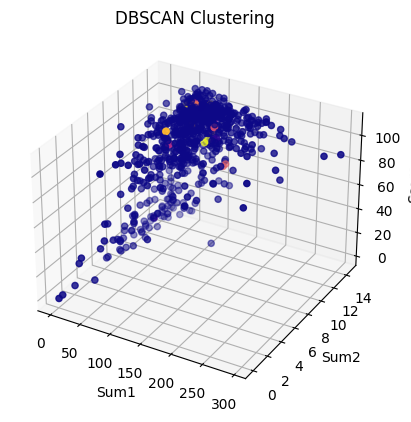

In [ ]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 应用 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # 调整 eps 和 min_samples 以适应您的数据
clusters = dbscan.fit_predict(classification_data[['Sum1', 'Sum2', 'Score']])
labels = dbscan.fit_predict(features)
mask = labels != -1
filtered_labels = labels[mask]
filtered_features = features[mask]

if np.unique(filtered_labels).size > 1:
    silhouette_avg = silhouette_score(filtered_features, filtered_labels)
    print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
else:
    print("所有数据点都被标记为噪声，无法计算轮廓系数")

# 三维可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(classification_data['Sum1'], classification_data['Sum2'], classification_data['Score'], c=clusters, cmap='plasma')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Sum1')
ax.set_ylabel('Sum2')
ax.set_zlabel('Score')
plt.show()

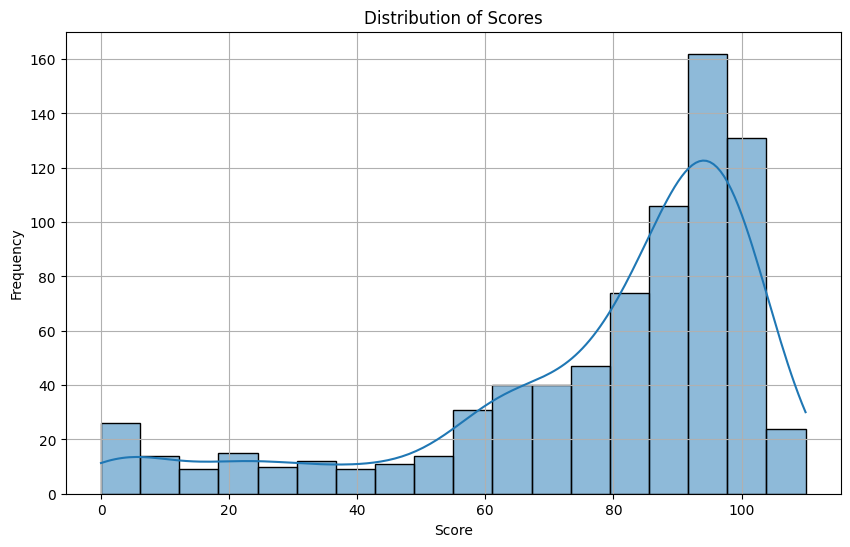

count    775.000000
mean      77.608723
std       26.622073
min        0.000000
25%       67.490000
50%       87.400000
75%       96.105000
max      110.000000
Name: Score, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Score' column
plt.figure(figsize=(10, 6))
sns.histplot(classification_data['Score'], kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Descriptive statistics of the 'Score' column
classification_data['Score'].describe()